<a href="https://colab.research.google.com/github/shyamjith94/TimeSeriesDataAnalysis/blob/main/VARMAX(VectorAutoRegressionMovingAverage).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:

%%capture
! pip3 install pmdarima

In [43]:
import pandas as pd
import numpy as np

from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
from pmdarima import auto_arima

import warnings
warnings.filterwarnings('ignore')


In [44]:
data = pd.read_csv("/content/drive/My Drive/TimeSeriesDataAnalysis/Data/M2SLMoneyStock.csv", index_col=0, parse_dates=True)
data.index.freq = 'MS'
data.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [45]:
data_1 = pd.read_csv("/content/drive/My Drive/TimeSeriesDataAnalysis/Data/PCEPersonalSpending.csv", index_col=0, parse_dates=True)
data_1.index.freq = 'MS'
data_1.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [46]:
data = data.join(data_1)

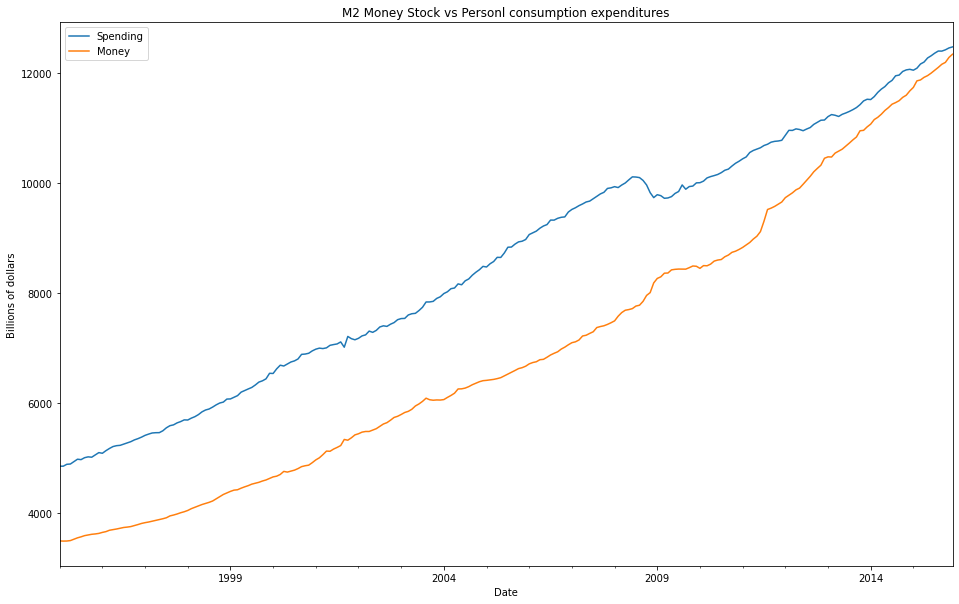

In [47]:
title = "M2 Money Stock vs Personl consumption expenditures"
y_label = "Billions of dollars"
x_label = ""

ax = data['Spending'].plot(figsize=(16,10), title=title, legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=x_label, ylabel=y_label)
data['Money'].plot(legend=True)

In [48]:
def adf_test(series, title=''):
    """
    pass time series and titile is optional
    return ADF report
    """
    print(f'Augmented Dickey-Fuller test : {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    # AIC auto choose lags
    label = ['ADF test statistics', 'p_value', 'lags_used', 'observations']
    out = pd.Series(result[0:4], index=label)

    # iterate adfuller test dict
    for key, val in result[4].items():
        out[f'critical_value({key})'] = val
    print(out.to_string())
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data a unit root and is non-stationay')

In [49]:
adf_test(data['Money'])

Augmented Dickey-Fuller test : 
ADF test statistics      4.239022
p_value                  1.000000
lags_used                4.000000
observations           247.000000
critical_value(1%)      -3.457105
critical_value(5%)      -2.873314
critical_value(10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data a unit root and is non-stationay


In [50]:
adf_test(data['Spending'])

Augmented Dickey-Fuller test : 
ADF test statistics      0.149796
p_value                  0.969301
lags_used                3.000000
observations           248.000000
critical_value(1%)      -3.456996
critical_value(5%)      -2.873266
critical_value(10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data a unit root and is non-stationay


In [51]:
auto_arima(data['Money'], maxiter=1000).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -1176.729
Date:                Tue, 17 Nov 2020   AIC                           2359.458
Time:                        08:52:30   BIC                           2370.023
Sample:                             0   HQIC                          2363.710
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.042      5.297      0.000       0.140       0.305
ma.L1         -0.9481      0.021    -45.132      0.000      -0.989      -0.907
sigma2       712.5495     33.501     21.270      0.000     646.889     778.210
===================================================================================
Ljung-Box (Q):                       80.87   Jarque-Bera (JB):               598.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.31   Skew:                             1.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
auto_arima(data['Spending'], maxiter=1000).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1238.601
Date:                Tue, 17 Nov 2020   AIC                           2487.202
Time:                        08:52:35   BIC                           2504.829
Sample:                             0   HQIC                          2494.295
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.7221      3.525      1.907      0.057      -0.187      13.631
ar.L1          0.7774      0.120      6.469      0.000       0.542       1.013
ma.L1         -0.7889      0.117     -6.767      0.000      -1.017      -0.560
ma.L2          0.1342      0.062      2.171      0.030       0.013       0.255
sigma2      1131.1359     61.857     18.286      0.000    1009.898    1252.373
===================================================================================
Ljung-Box (Q):                       34.25   Jarque-Bera (JB):               216.24
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.30
Prob(H) (two-sided):                  0.92   Kurtosis:                         7.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
# diffrencing data
data_transformed = data.diff().diff()
data_transformed = data_transformed.dropna()
data_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [54]:
num_obs = 12
train_data = data_transformed[0:-num_obs]
test_data = data_transformed[-num_obs:]

**VARMA Model Fit**

In [55]:
model = VARMAX(train_data, order=(1,1), trend='c')
result = model.fit(maxiter=1000,disp=False)
result.summary()

Dep. Variable:,"['Money', 'Spending']",No. Observations:,238
Model:,"VARMA(1,1)",Log Likelihood,-2287.896
,+ intercept,AIC,4601.791
Date:,"Tue, 17 Nov 2020",BIC,4646.931
Time:,08:52:41,HQIC,4619.983
Sample:,03-01-1995,,
,- 12-01-2014,,
Covariance Type:,opg,,
Ljung-Box (Q):,"74.89, 27.42",Jarque-Bera (JB):,"540.10, 138.54"
Prob(Q):,"0.00, 0.93",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"5.61, 2.90",Skew:,"1.30, -0.35"


In [56]:
model_1 = VARMAX(train_data, order=(1,2), trend='c')
result_1 = model_1.fit(maxiter=1000,disp=False)
result_1.summary()

Dep. Variable:,"['Money', 'Spending']",No. Observations:,238
Model:,"VARMA(1,2)",Log Likelihood,-2286.309
,+ intercept,AIC,4606.618
Date:,"Tue, 17 Nov 2020",BIC,4665.646
Time:,08:53:03,HQIC,4630.407
Sample:,03-01-1995,,
,- 12-01-2014,,
Covariance Type:,opg,,
Ljung-Box (Q):,"68.08, 28.09",Jarque-Bera (JB):,"566.68, 126.74"
Prob(Q):,"0.00, 0.92",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"5.68, 2.89",Skew:,"1.36, -0.35"


In [57]:
data_forecast = result.forecast(12)
data_forecast

,Money,Spending
2015-01-01,-14.114916,35.856282
2015-02-01,-7.408660,-4.259215
2015-03-01,-1.062508,-0.190395
2015-04-01,-0.077476,0.005325
2015-05-01,0.127476,0.073601
2015-06-01,0.166828,0.085411
2015-07-01,0.174539,0.087792
2015-08-01,0.176042,0.088252
2015-09-01,0.176336,0.088342
2015-10-01,0.176393,0.088360


In [58]:
data_forecast_1 = result_1.forecast(12)
data_forecast_1

,Money,Spending
2015-01-01,-12.191798,37.365311
2015-02-01,-11.205112,-5.136945
2015-03-01,1.885681,-0.115447
2015-04-01,-1.831952,-0.365111
2015-05-01,1.318704,0.279979
2015-06-01,-0.579469,-0.055138
2015-07-01,0.659448,0.172887
2015-08-01,-0.132621,0.028596
2015-09-01,0.376422,0.121573
2015-10-01,0.049707,0.061938


In [59]:
#money
data_forecast['Money_1D'] = (data['Money'].iloc[-num_obs-1] - data['Money'].iloc[-num_obs-2]) + data_forecast['Money'].cumsum()
data_forecast['MoneyForecast'] = data['Money'].iloc[-num_obs-2] + data_forecast['Money_1D'].cumsum()
# spending
data_forecast['Spending_1D'] = (data['Spending'].iloc[-num_obs-1] - data['Spending'].iloc[-num_obs-2]) + data_forecast['Spending'].cumsum()
data_forecast['SpendingForecast'] = data['Spending'].iloc[-num_obs-2] + data_forecast['Spending_1D'].cumsum()
data_forecast.head()

,Money,Spending,Money_1D,MoneyForecast,Spending_1D,SpendingForecast
2015-01-01,-14.114916,35.856282,64.485084,11655.985084,46.456282,12097.856282
2015-02-01,-7.408660,-4.259215,57.076425,11713.061509,42.197067,12140.053349
2015-03-01,-1.062508,-0.190395,56.013917,11769.075426,42.006672,12182.060021
2015-04-01,-0.077476,0.005325,55.936441,11825.011867,42.011998,12224.072019
2015-05-01,0.127476,0.073601,56.063916,11881.075783,42.085599,12266.157618


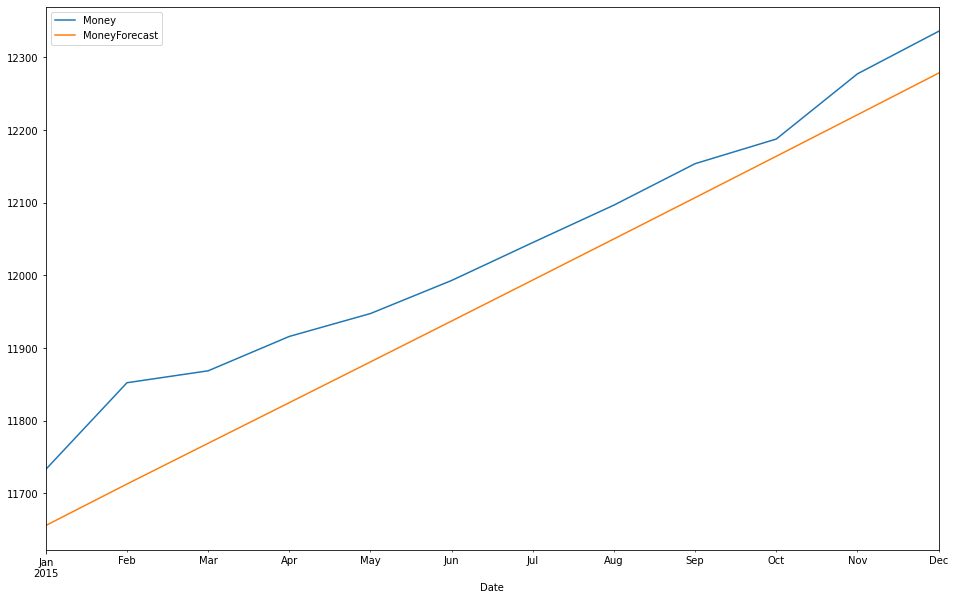

In [60]:
data['Money'][-num_obs:].plot(figsize=(16,10), legend=True)
data_forecast['MoneyForecast'].plot(legend=True)


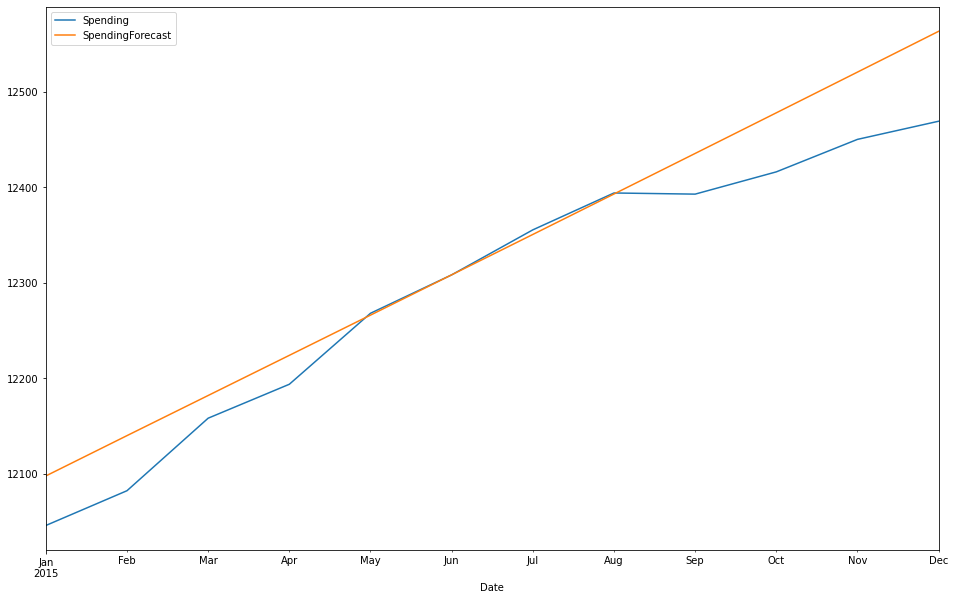

In [61]:
data['Spending'][-num_obs:].plot(figsize=(16,10), legend=True)
data_forecast['SpendingForecast'].plot(legend=True)


In [62]:
rmse(data['Money'][-num_obs:], data_forecast['MoneyForecast'])

73.71590900083096

In [63]:
rmse(data['Spending'][-num_obs:], data_forecast['SpendingForecast'])

47.403926260587795

In [64]:
#money
data_forecast_1['Money_1D'] = (data['Money'].iloc[-num_obs-1] - data['Money'].iloc[-num_obs-2]) + data_forecast_1['Money'].cumsum()
data_forecast_1['MoneyForecast'] = data['Money'].iloc[-num_obs-2] + data_forecast_1['Money_1D'].cumsum()
# spending
data_forecast_1['Spending_1D'] = (data['Spending'].iloc[-num_obs-1] - data['Spending'].iloc[-num_obs-2]) + data_forecast_1['Spending'].cumsum()
data_forecast_1['SpendingForecast'] = data['Spending'].iloc[-num_obs-2] + data_forecast_1['Spending_1D'].cumsum()
data_forecast_1.head()

,Money,Spending,Money_1D,MoneyForecast,Spending_1D,SpendingForecast
2015-01-01,-12.191798,37.365311,66.408202,11657.908202,47.965311,12099.365311
2015-02-01,-11.205112,-5.136945,55.203090,11713.111293,42.828367,12142.193678
2015-03-01,1.885681,-0.115447,57.088771,11770.200064,42.712920,12184.906598
2015-04-01,-1.831952,-0.365111,55.256819,11825.456882,42.347809,12227.254406
2015-05-01,1.318704,0.279979,56.575523,11882.032405,42.627787,12269.882193


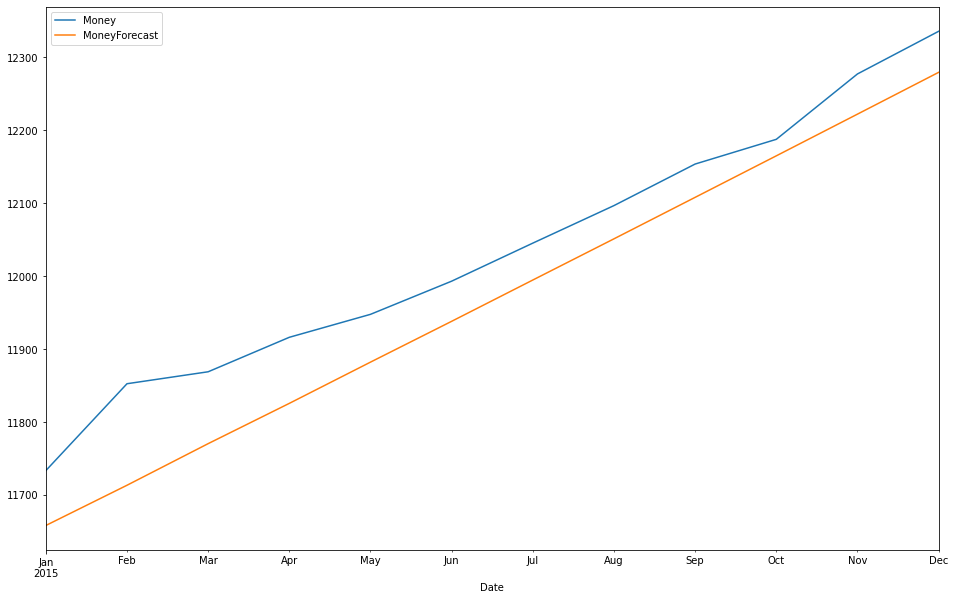

In [65]:
data['Money'][-num_obs:].plot(figsize=(16,10), legend=True)
data_forecast_1['MoneyForecast'].plot(legend=True)

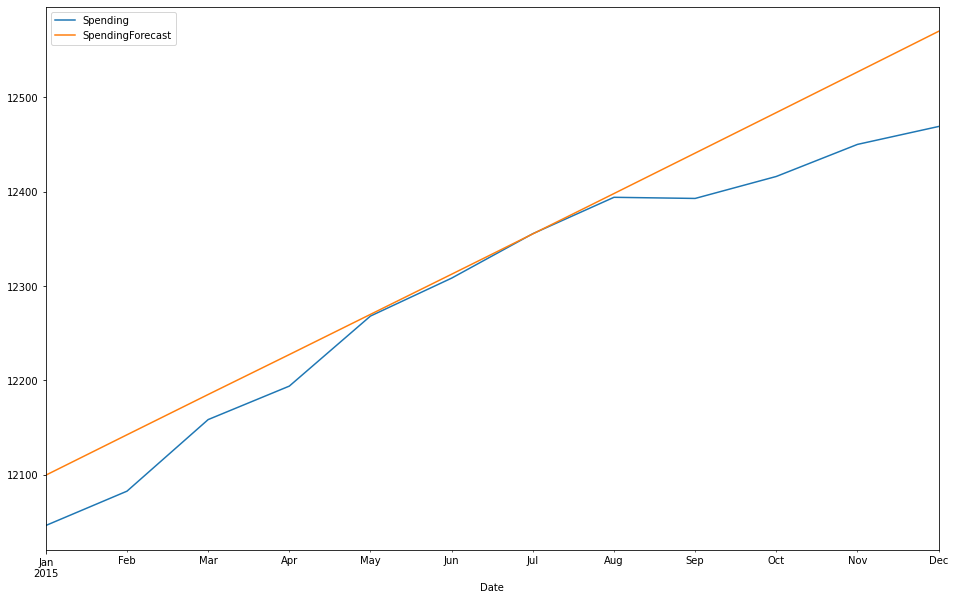

In [66]:
data['Spending'][-num_obs:].plot(figsize=(16,10), legend=True)
data_forecast_1['SpendingForecast'].plot(legend=True)

In [67]:
rmse(data['Money'][-num_obs:], data_forecast_1['MoneyForecast'])

72.91078891573673

In [68]:
rmse(data['Spending'][-num_obs:], data_forecast_1['SpendingForecast'])

51.04334913262422